In [1]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
# %matplotlib inline
from matplotlib.pyplot import cm

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

### Illustration of brain slices

In [3]:
test = pd.read_csv('./sag_data.csv',dtype={"cell_label":str})

In [4]:
sections = ['Zhuang-ABCA-3.024','Zhuang-ABCA-3.023','Zhuang-ABCA-3.022','Zhuang-ABCA-3.021','Zhuang-ABCA-3.020']
#sections = ['Zhuang-ABCA-3.015','Zhuang-ABCA-3.016','Zhuang-ABCA-3.017']
filtered = test[test['brain_section_label'].isin(sections)]

In [5]:
def parcellation_cell_count(df,level) :
    cell_count = df.groupby(level)[['cluster_confidence_score']].count()
    cell_count.columns = ['number_of_cells']
    cell_count.sort_values('number_of_cells',ascending=False,inplace=True)
    return cell_count

In [40]:
# %matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as plticker

In [53]:
def section_plot(axs,t, section):
    filtered = test[test['brain_section_label']==section]
    cell_count = parcellation_cell_count(filtered,'parcellation_substructure')
    r1 = [v for v in cell_count.index if '1' in v]
    r23 = [v for v in cell_count.index if '2/3' in v]
    r4 = [v for v in cell_count.index if '4' in v]
    r5 = [v for v in cell_count.index if '5' in v]
    r6 = [v for v in cell_count.index if '6' in v]
    r = [r1, r23, r4+r5, r6]
    color = cm.rainbow(np.linspace(0, 1, len(r)))
    lab = ['L1', 'L2/3', 'L4/5','L6']
    for i, txt in enumerate(r):
        filtered_1 = filtered[filtered['parcellation_substructure'].isin(txt)]
        axs[t].scatter(filtered_1['x'],filtered_1['y'],s=0.5,color=color[i],marker='.',label=lab[i], zorder=1)
        axs[t].set_ylim(max(filtered['y'])+0.3,min(filtered['y']-0.3))
        axs[t].xaxis.set_tick_params(labelsize=20)
        axs[t].yaxis.set_tick_params(labelsize=20)
        #axs[t].xaxis.set_major_formatter(FormatStrFormatter('%d mm'))
        #axs[t].set_xlim(3,11)
        axs[t].yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[t].xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        axs[t].yaxis.set_major_locator(plticker.MultipleLocator(1))
        axs[t].xaxis.set_major_locator(plticker.MultipleLocator(1))
        axs[t].yaxis.set_minor_locator(plticker.MultipleLocator(0.5))
        txt = '#' + str(" ")+str(24-t)
        axs[t].text(0.1, 0.95, txt, fontsize=25 ,ha='center', va='center', transform=axs[t].transAxes,bbox=dict(facecolor='grey', alpha=0.1))
        if t==0:
            axs[t].text(0.05, 0.05, 'A', fontsize=20 ,ha='center', va='center', transform=axs[t].transAxes)
            axs[t].text(0.95, 0.95, 'P', fontsize=20 ,ha='center', va='center', transform=axs[t].transAxes)
        if t==4:
            axs[t].legend(loc='lower right',fontsize=20,markerscale=20)

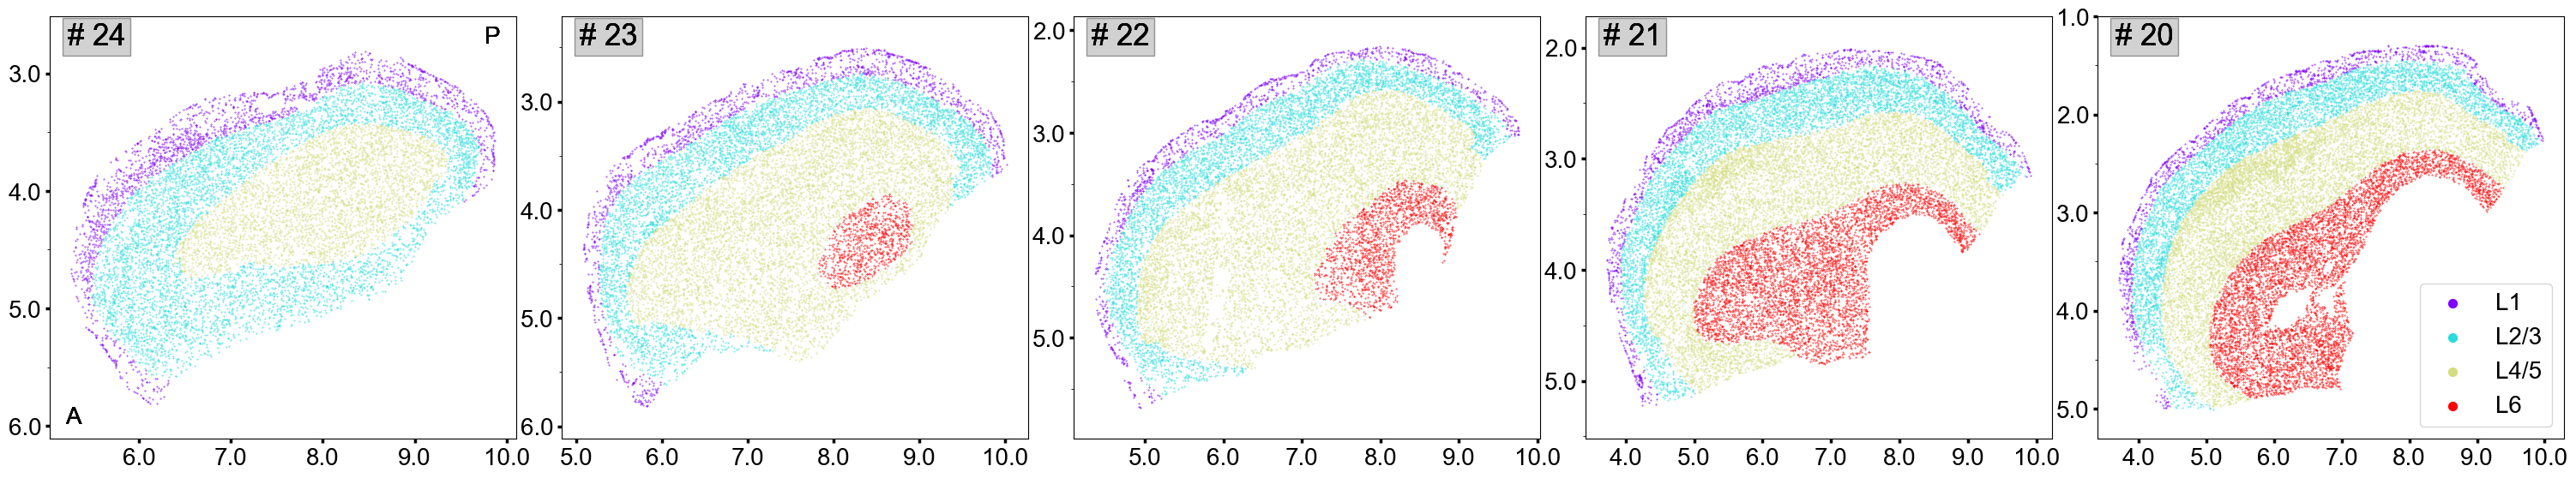

In [54]:
fig, axs = plt.subplots(1,5,figsize=(30,5.5))
fig.tight_layout()
for t in range(len(sections)):
    section_plot(axs, t,sections[t])

In [52]:
fig.savefig('test.png', bbox_inches='tight')